### COMSM0140: Internet Economics and Financial Technology 2023. Main coursework. 
### Radmehr Ghassabtabarshiadeh

Part A

A/B testing to determine whether SHVR or ZIC traders perform better using BSE market sessions simulation. SHVR or shaver trader, undercuts the best ask while ZIC uses only constraints to trade. The null hypothesis tested is that there is no signifacnt difference between the two traders and the alternative hypothesis of there being a signifacnt difference between the two traders, with the significance value (alpha) set to 0.05. A market session will run with the specification mentioned on the brief with start time and end time are set to 0 and 1800 seconds (30 minutes) respectively due to performance constrains. After the simulation are complete, two data frames are created, one with everything the "dump_avgbals" creates and another only taking in the accumilated average profit of each trader, this process is repeated for n number of sessions. To test the hypothesis, first normality of the data ismeasured and either a parametric or a non-parametric test is performed. Some helper functions are below to help do what was described. The functions "make_df" and "collect_avg_profit" are helper functions for "run_market_sim" which create a dataframe and grab the average profit for the two traders after each n session. The collected averages, are passed in to Shapiro-Wilk test to understand their distribution. t-test will be utilised as the parametric test and Mann-Whitney-U as the non-parametric test.

In [1]:
from helper import *
import numpy as np

supply_range = (310, 310)
demand_range = (250, 490)
start_time = 0
end_time = 10*60*3

In [2]:
n500mean_shvr, n500mean_zic = run_market_sim(trial_id="n500", no_sessions=500, R=50, n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time, path='n500_avg_balance.csv')
n50mean_shvr, n50mean_zic = run_market_sim(trial_id="n50", no_sessions=50, R=50, n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time, path='n50_avg_balance.csv')

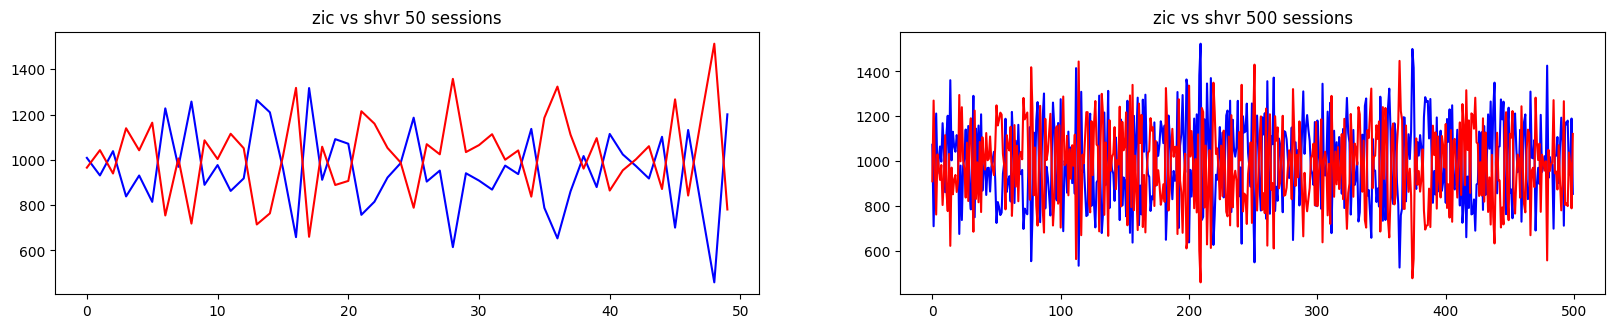

In [3]:
plot_performance(n50mean_zic, n500mean_zic, n50mean_shvr, n500mean_shvr)

The plots above showcase what was the average profit a trader made at the end of a session, zic traders being blue and shvr traders being red. It is observed that the profitablity is shared roughly equally between the two traders. So the expected results from the statistical test would be to conclude that we do not have sufficient evidence to reject the null hypothesis. That mean, there is no significant difference between the two traders when it comes to average profit in the market.

In [4]:
_, pvalue50_shvr = stats.shapiro(n500mean_shvr)
_, pvalue500_shvr = stats.shapiro(n50mean_shvr)
_, pvalue500_zic = stats.shapiro(n500mean_zic)
_, pvalue50_zic = stats.shapiro(n50mean_zic)
print(pvalue50_shvr, pvalue500_zic, pvalue50_zic, pvalue500_shvr)

0.03646748140454292 0.03805120661854744 0.5560976266860962 0.5503970980644226


Since the market is populated with similar ratios of buyers and sellers of each type, the variance of the two trader's profits is also roughly similar. Shapiro-Wilk test is utilised to understand the distribution of each data, if they are following a normal distribution a parametric test is used, otherwise a non-parametric test is utilised. As the output n=50 is not following a normall distribution therefore a non-parametric test such as Mann-Whitney-U test will be applied, and for n=500, dataset is following a normal distribution therefore, a t-test can be used.

In [12]:
_, p_val50 = stats.mannwhitneyu(n50mean_zic, n50mean_shvr)
print(p_val50, 'p val for 50 sessions')
_, p_val500 = stats.ttest_ind(n500mean_zic, n500mean_shvr)
print(p_val500, 'p val for 500 sessions')

0.04825913882496511 p val for 50 sessions
0.10912242431597885 p val for 500 sessions


In the simulated market sessions, the p value for both number of sessions n is above the threshold of 0.05, meaning we do not have sufficient evidence to reject the null hypothesis. In other words, we can conclude that there is no significant difference between the two trader's performance when comparing the average profit per session.

PART B

For this part, the ratio of the market agents are manipulated to the brief's specification. Code cell below, modifies the previously used code to accomedate these changes by collecting and returning the resaults in an two dimensional array. Within each resault, there are two data sets, the first being mean profit of shvr while the second being zic traders. For each pair of data, 9 in this case, they will be tested to see whether they are normaly distributed using Shapiro-Wilk and then appropriate hypothesis testing. Another thing to consider is the variance of the data, since there are different number of traders in the market, the variance difference will be high. Welch's t-test is a form of t-test when variance variable is set to false and is utilised here.

In [6]:
R = [10, 20, 30, 40, 50, 60, 70, 80, 90]

res50 = R_market_run(R, 50, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time) #9 arr corresponding to each ratio, res[n][0]=shvr, [n][1]=zic each 50 long                                                                                                             #res[n][0] = shvr, res[n][1] = zic
res500 = R_market_run(R, 500, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time) #same as above but 500 long

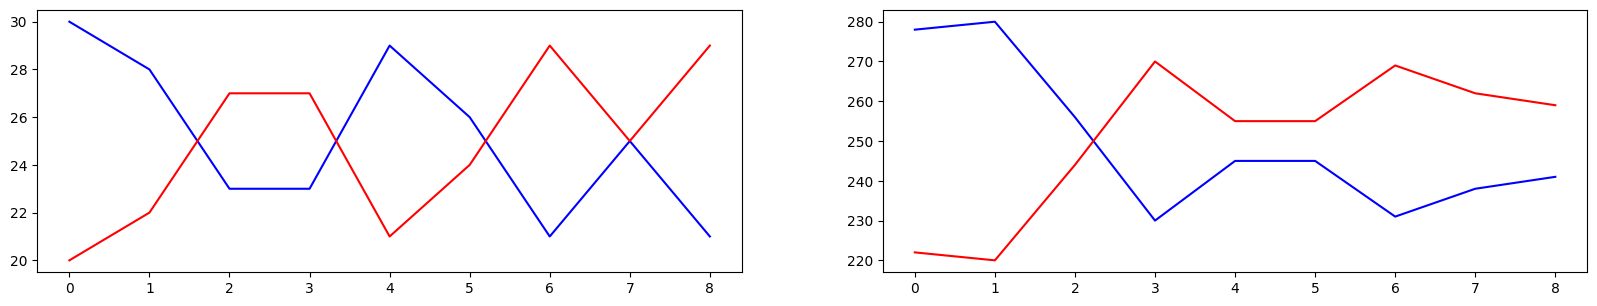

In [7]:
plot_wins(res50, res500)

To visualise the results of the market sessions, the number of "wins" a trader has over the other is plotted against all ratios from 1 to 9m with blue being shvr and red zic. The "number of wins" means the number of time the average profit of a the trader was higher than the other trader during the n sessions with a given ratio, ie at 0 for every 1 shvr trader there are 9 zic traders. The data suggest that shaver traders perform very well when there are less of them in the market and as the number of ZIC traders grow, ZIC starts to be the more profitable trader on average. All left to do is to test the significance of this data collected to draw a conclusion. To account for this high variance, when using a t-test, "equal_var" variable is set to False.

In [8]:
p_vals_50 = collect_pvals_norm(res50)
p_vals_500 = collect_pvals_norm(res500)

p_res50 = A_B_test(p_vals_50, res50)
p_res500 = A_B_test(p_vals_500, res500)

n=50, ratio: 1 to 9 is NOT normal used NON-parametric test, p val is: 0.0540
n=50, ratio: 2 to 8 is NORMAL used parametric test, p val is: 0.0593
n=50, ratio: 3 to 7 is NORMAL used parametric test, p val is: 0.8386
n=50, ratio: 4 to 6 is NORMAL used parametric test, p val is: 0.9755
n=50, ratio: 5 to 5 is NORMAL used parametric test, p val is: 0.9480
n=50, ratio: 6 to 4 is NORMAL used parametric test, p val is: 0.8060
n=50, ratio: 7 to 3 is NORMAL used parametric test, p val is: 0.0204
n=50, ratio: 8 to 2 is NORMAL used parametric test, p val is: 0.7278
n=50, ratio: 9 to 1 is NORMAL used parametric test, p val is: 0.0760
n=500, ratio: 1 to 9 is NOT normal used NON-parametric test, p val is: 0.0006
n=500, ratio: 2 to 8 is NORMAL used parametric test, p val is: 0.0000
n=500, ratio: 3 to 7 is NOT normal used NON-parametric test, p val is: 0.0467
n=500, ratio: 4 to 6 is NOT normal used NON-parametric test, p val is: 0.1595
n=500, ratio: 5 to 5 is NORMAL used parametric test, p val is: 0.12

When n=50, there is simply not enough data to conclude any evidence from the p values generated as it can vary dramatically with each run. In the simulation above, no consistant logic or pattern can be extracted from the output as mostly it suggest no significance except for one or two instances. However as the number of sessions are increased, for the ratios where there is less shavers in the market, the difference becomes significant to favour them. As the ratios get to the extreme ends of all of the market being shavers, the few zic traders in the market start giving higher average profit. Finally for the case of equal ratios, there is no difference between the two traders as observed before. In conclusion, Shavers perform best in a market dominated by zic traders and as the number of shavers and zic traders perform best in a market dominated by shavers.

PART C

Four trader types with different populations being tested to see whcich is the best. Having giveaway 'GVWY', shaver 'SHVR', zero intelligence constraint 'ZIC' and zero intelligence plus 'ZIP' traders at a predefined ratios below. Note that to gather all permutations, np.roll is used. the results are stored in an array where res[i][n] are the average means collected after then end of each session in the form of [['shvr'], ['gvwy'], ['zic'], ['zip]]. P values obtained are using either Annova test or kruskal test depending on whether data is parametric or non-parametric, all means collected have to be normal which is very unlikely, therefore only kruksal is expected to be used. Here rejecting the null hypothesis means there is a significant difference in the market but does not determine which trader is the best. Having a p value lower than 0.05 is expected in all sessions, and furthur analysis is needed to determine the best trader.

In [9]:
t = [25, 25, 25, 25]
t1 = [40, 20, 20, 20]
t2 = [10, 30, 30, 30]
t3 = [70, 10, 10, 10]


four_25_50Sessions, pval_25_n50 = run_market_sim_four("equal", 50, t, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
four_25_500_sess, pval_25_n500 = run_market_sim_four("equal_500", 500, t, 20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)

#res[i] = [mean[shvr], mean[gvwy], mean[zic], mean[zip]], each mean either 50 or 500 long where i is the permutation
res_4050, pvals4050 = [0] * 4, []
res_40500, pvals40500 = [0] * 4, []
res_10_50, pvals1050 = [0] * 4, []
res_10_500, pvals10500= [0] * 4, []
res_70_50, pvals7050 = [0] * 4, []
res_70_500, pvals70500 = [0] * 4, []
for i in range(len(t)):
    forty_50, p4050 = run_market_sim_four(trial_id="40_"+str(i)+"_perm", no_sessions=50, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_4050[i] = forty_50
    pvals4050.append(p4050)

    ten_50, p1050 = run_market_sim_four(trial_id="10_"+str(i)+"_perm", no_sessions=50, t=np.roll(t2, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_10_50[i] = ten_50
    pvals1050.append(p1050)

    seventy_50, p7050 = run_market_sim_four(trial_id="70_"+str(i)+"_perm", no_sessions=50, t=np.roll(t3, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_70_50[i] = seventy_50
    pvals7050.append(p7050)

    forty_500, p40500 = run_market_sim_four(trial_id="40_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_40500[i] = forty_500
    pvals40500.append(p40500)

    ten_500, p10500 = run_market_sim_four(trial_id="10_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_10_500[i] = ten_500
    pvals10500.append(p10500)

    seventy_500, p70500 = run_market_sim_four(trial_id="70_"+str(i)+"_perm_500", no_sessions=500, t=np.roll(t1, i), n=20, supply_range=supply_range, demand_range=demand_range, start_time=start_time, end_time=end_time)
    res_70_500[i] = seventy_500
    pvals70500.append(p70500)

Code sell below checks whether there is any p value greater than 0.05. As expected, there are non, suggesting there is a difference between the traders, further analysis is required to understand what trader is the best.

In [176]:
print(find_bigger(pvals10500), find_bigger(pvals7050), find_bigger(pvals70500), find_bigger(pvals1050), find_bigger(pvals40500), find_bigger(pvals4050))
print(pval_25_n50, 'same ratio n=50', pval_25_n500, 'n=500')

[] [] [] [] [] []
9.095967865014603e-16 same ratio n=50 4.258304089503018e-168 n=500


Plots below, visualise the data for better understanding of what trader type if performing well in the market. For when there are similar numbers of traders of each type, the average profit is plotted but for when there is inbalance, the number of wins is plotted for each trader. Here, shavers are red, green is gvwy, zic is blue and yellow is zip traders. The data suggests the worst performing trader is the zip trader regardless of the ratios, except for one instance when n=50 with 70% of the market being zip traders however when the n=500 the zip goes back to being the worst trader. The competition in the market is mainly between the zic and shvr traders where depending on the ratio, one of them turns better average profit values. As previously observed, shavers perform better when there are less of them and zic performs best when there is more of them as seen in permutations.

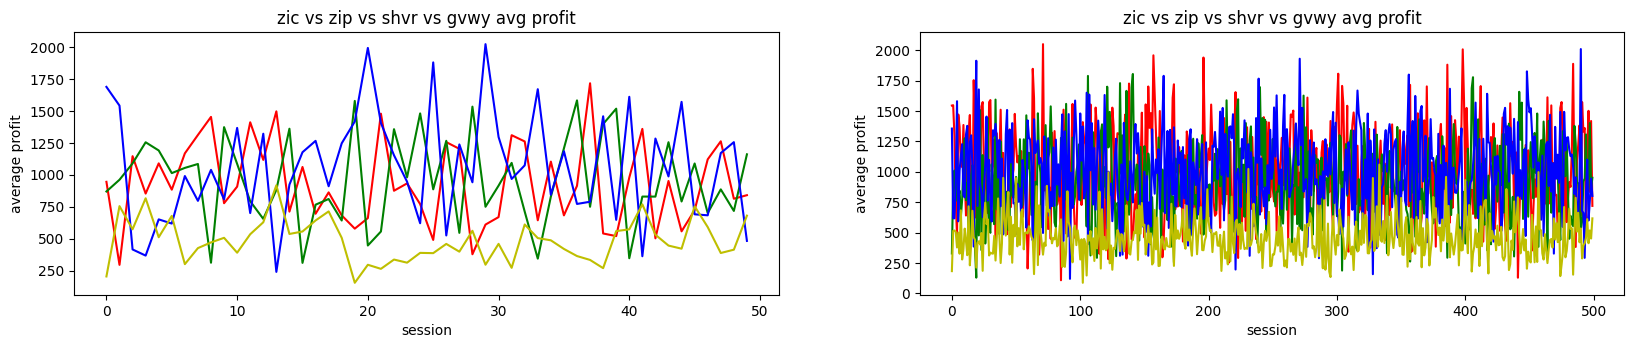

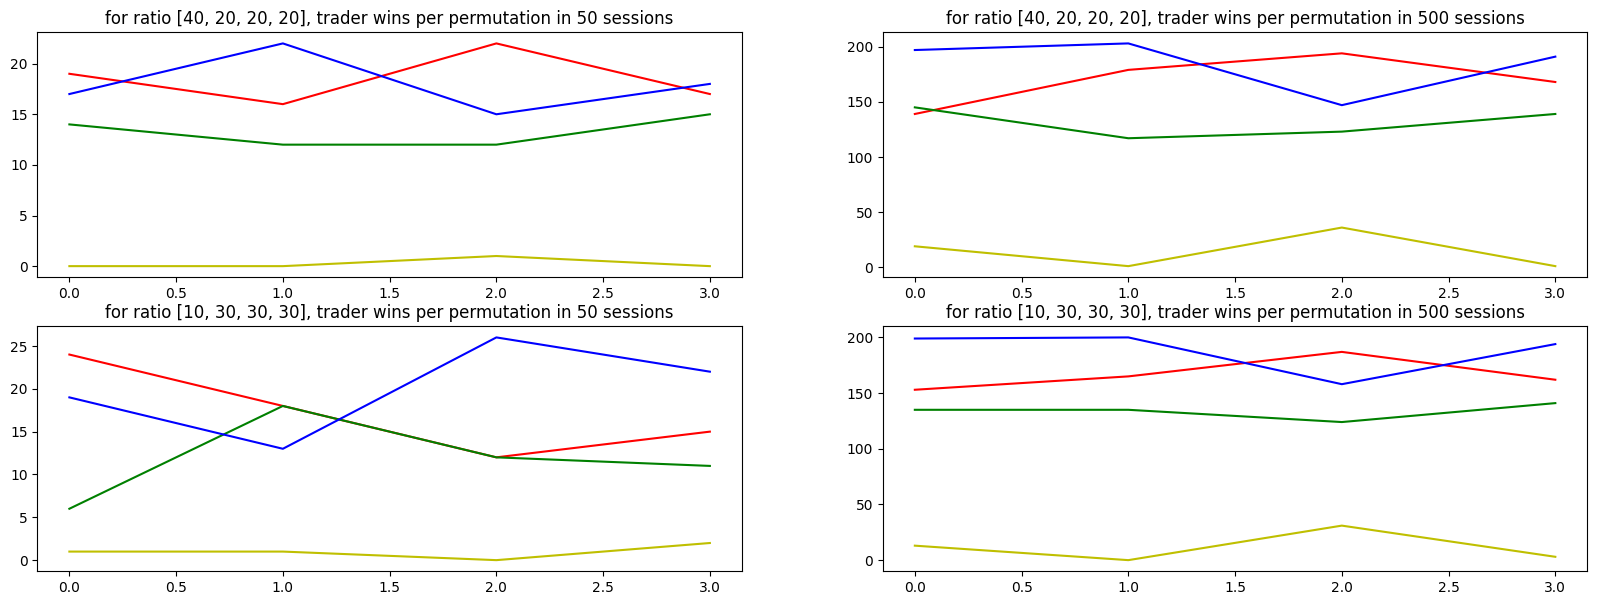

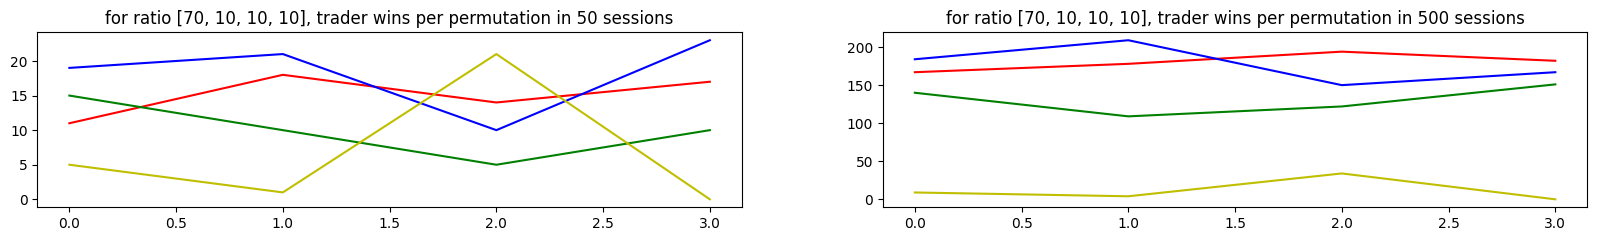

In [142]:
plot_performance_same_ratio(four_25_50Sessions, four_25_500_sess)
plot_wins_4(res_4050, t1, res_40500, t1, res_10_50, t2, res_10_500, t2, res_70_50, t3, res_70_500, t3)

PART D.1:
single zipsh trader of type buyyer, 10 buyers and seller of type zic, start =0, end = 30 days, n = 40 (cuz sample higher than 30 is usually enough and enough time and cpu), supply=(50, 75), buy=(125, 150), set k=4, beta u(0.01, 0.01), margin= u(0.05, 0.05)

In [239]:
#40 sessions, start=0 end= 60*60*24*30 (30 days)
n = 40
start_time=0
end_time=60*60*24*30
supply=(50, 75)
buy=(125, 150)
zipsh_profit, zic_profit, avg_pps_total, total_avg_profit_perS = run_market_sim_D("replicate", n, supply_range, demand_range, start_time, end_time, "replicate_avg_balance.csv")

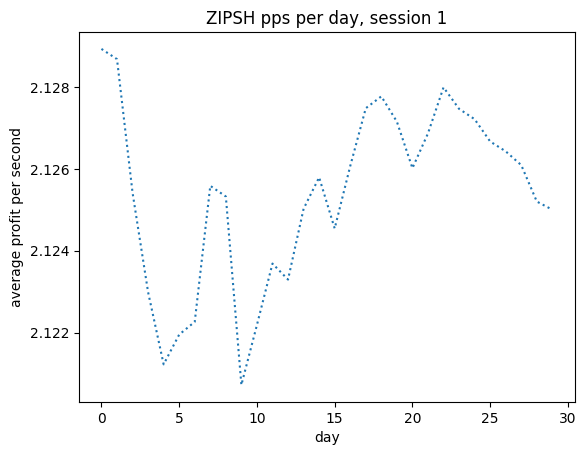

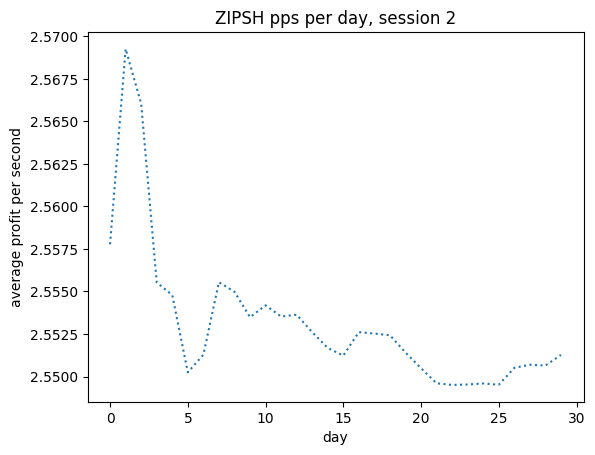

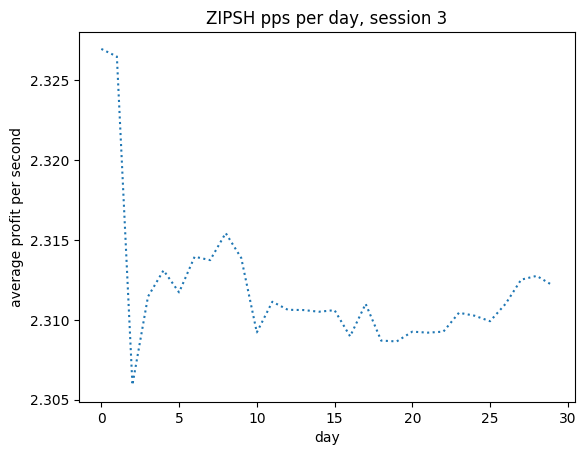

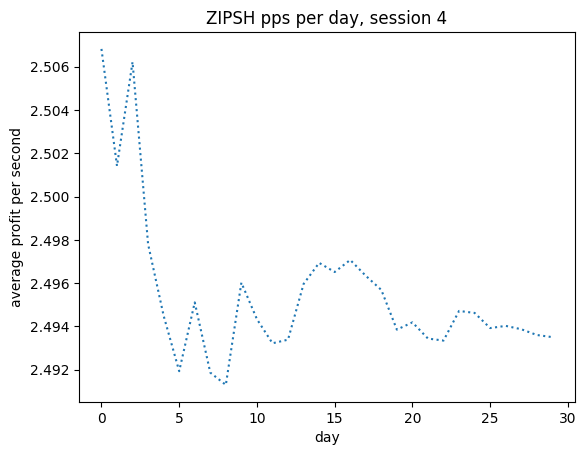

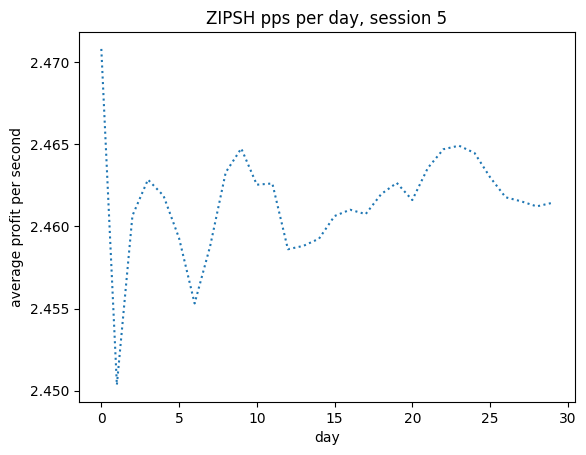

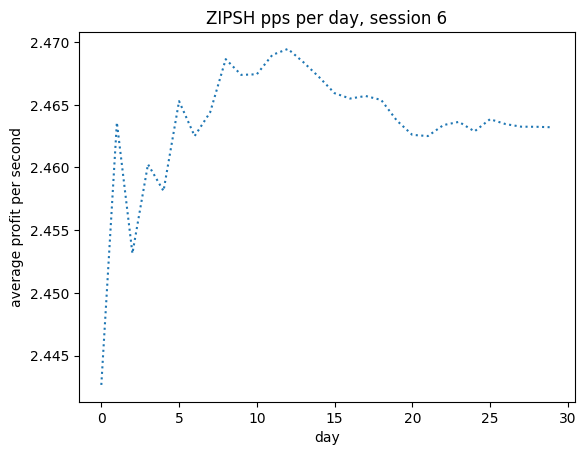

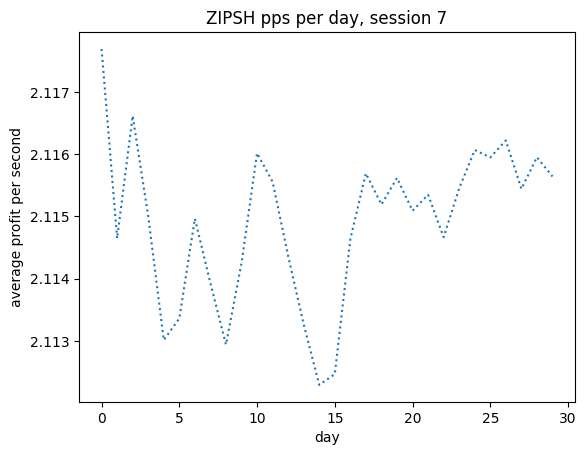

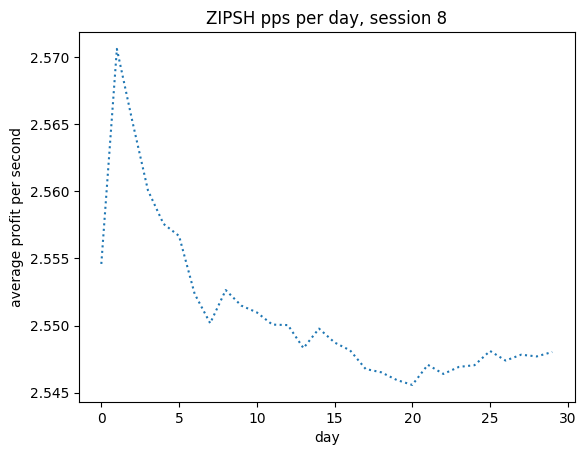

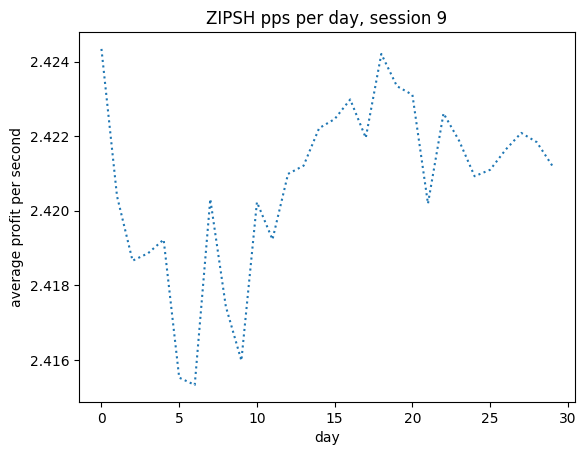

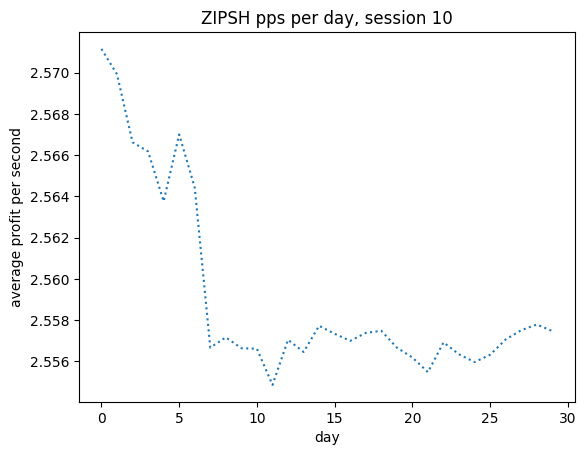

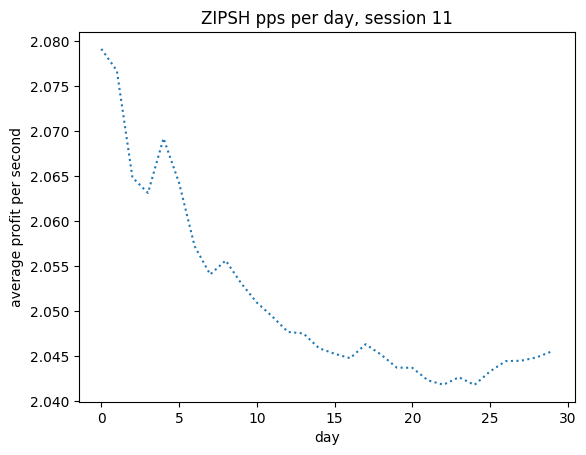

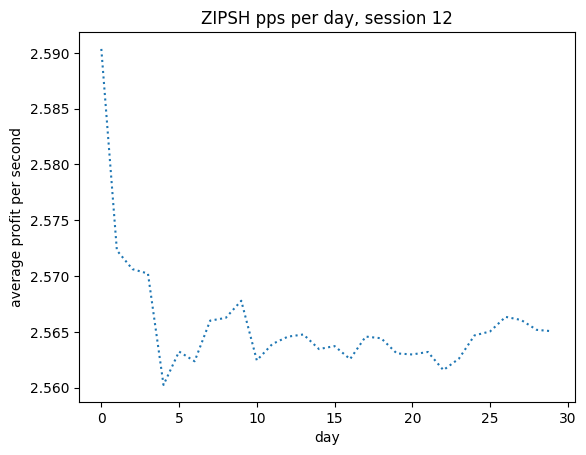

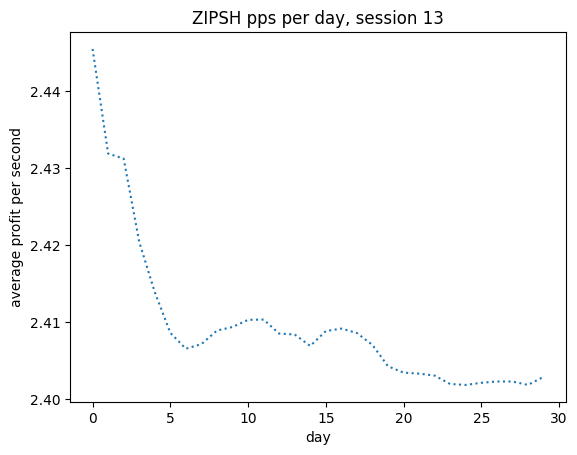

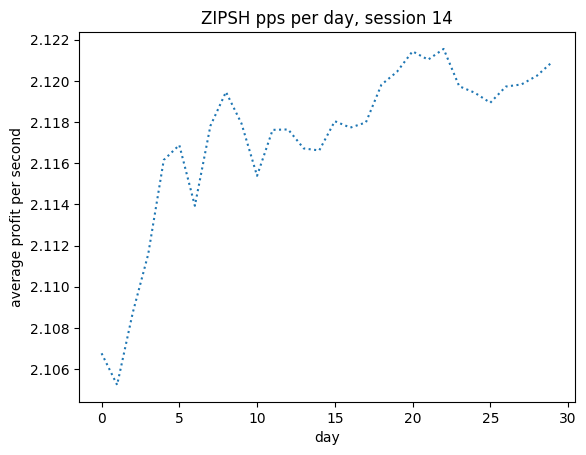

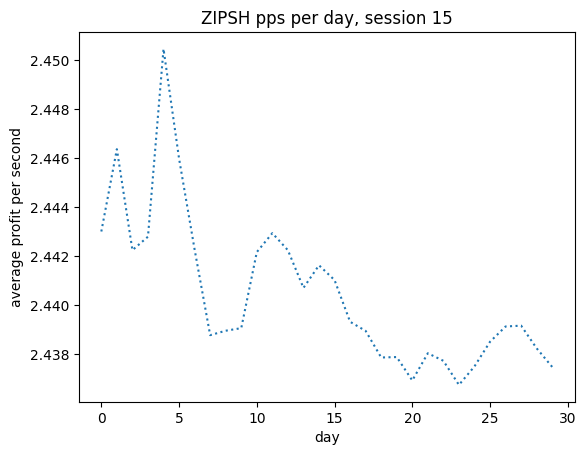

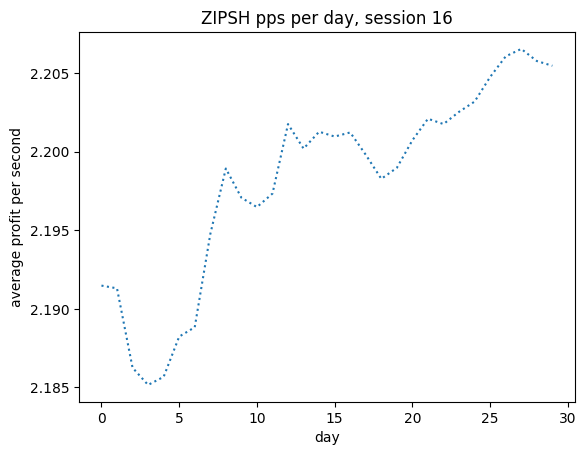

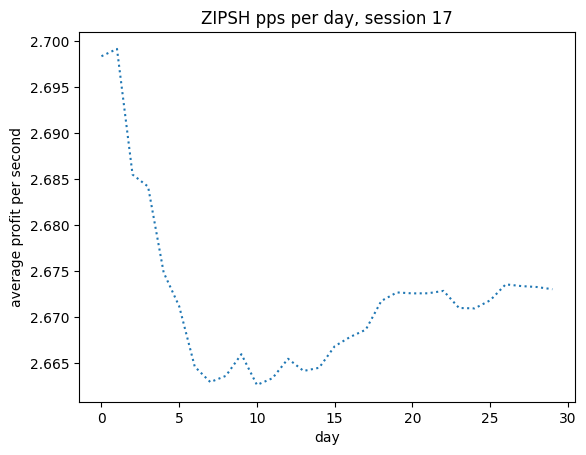

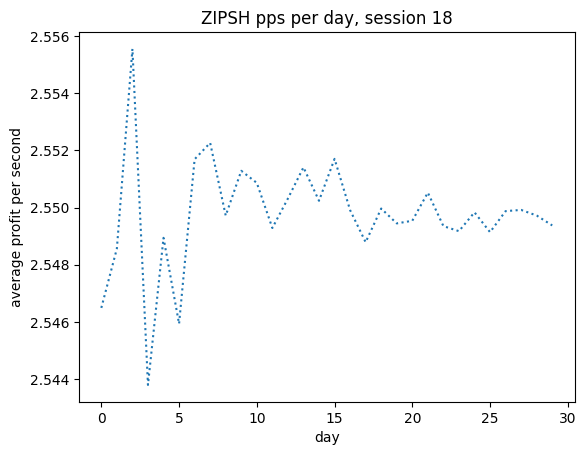

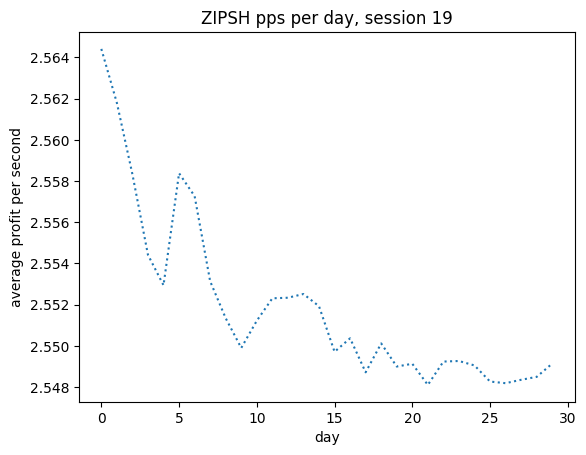

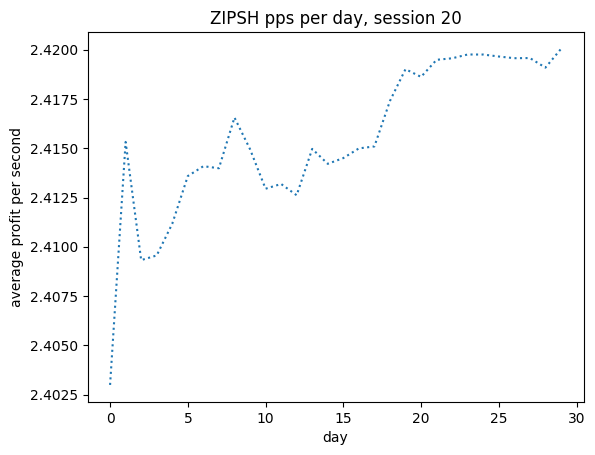

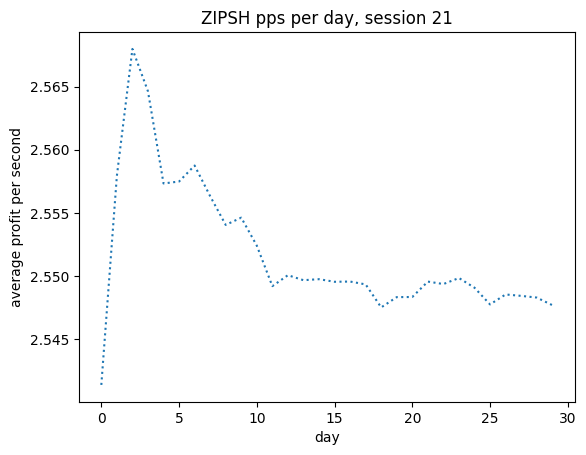

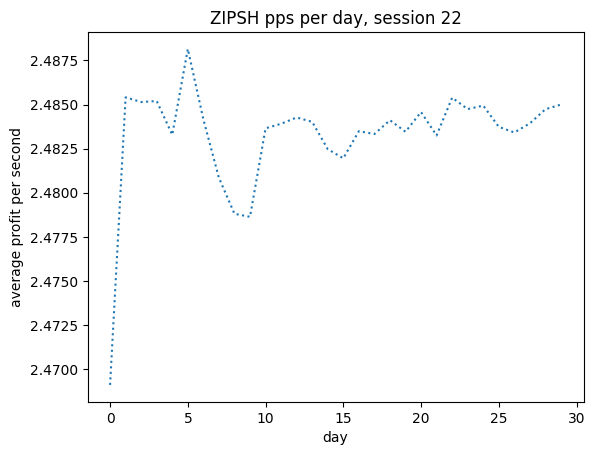

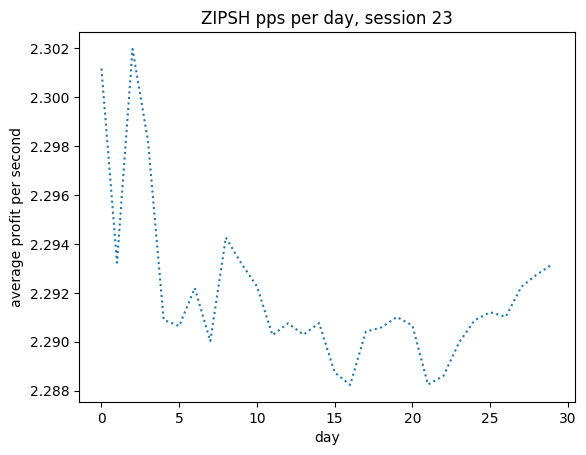

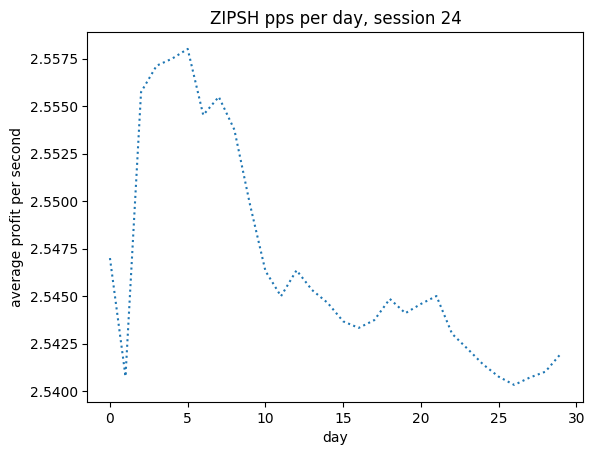

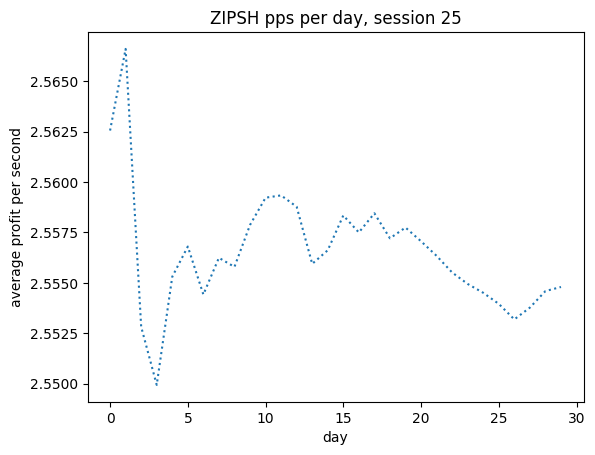

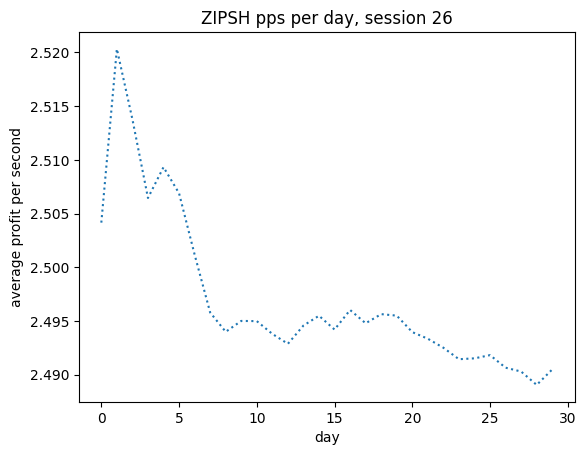

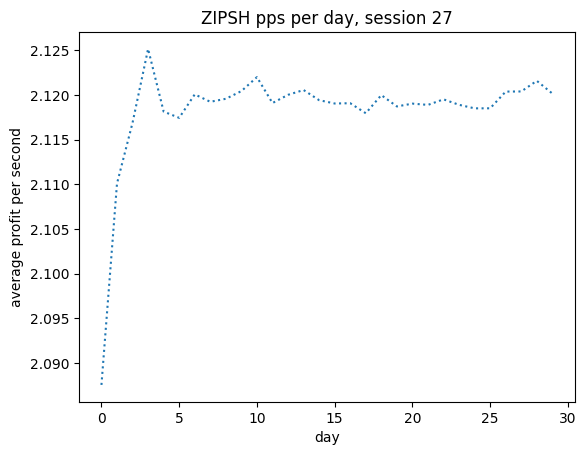

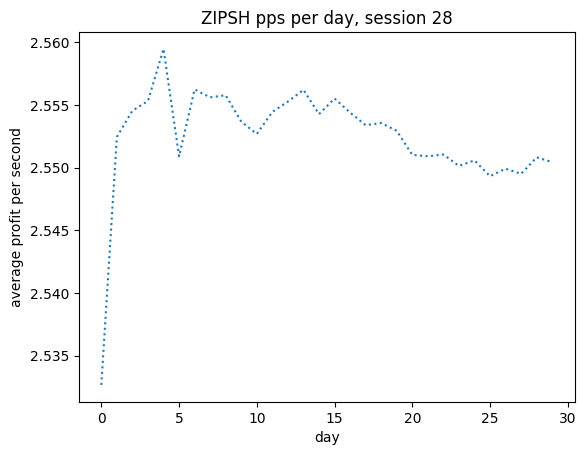

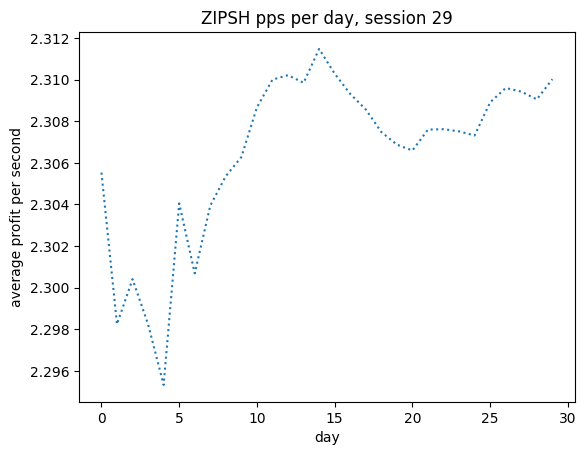

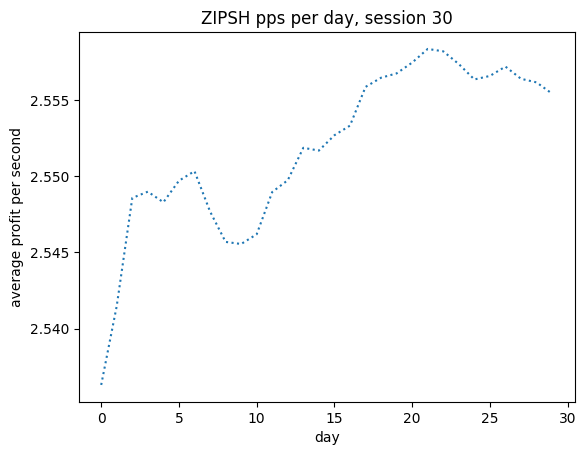

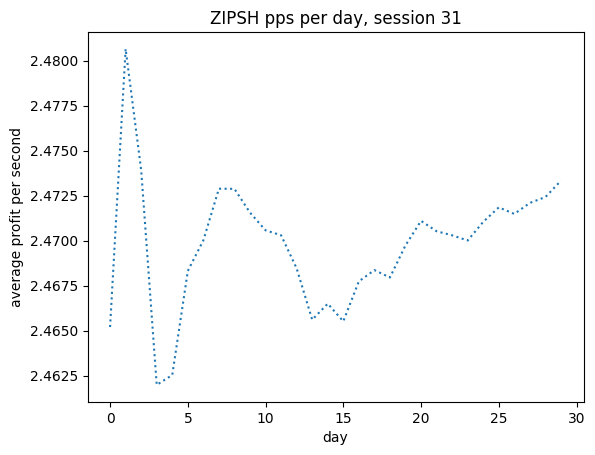

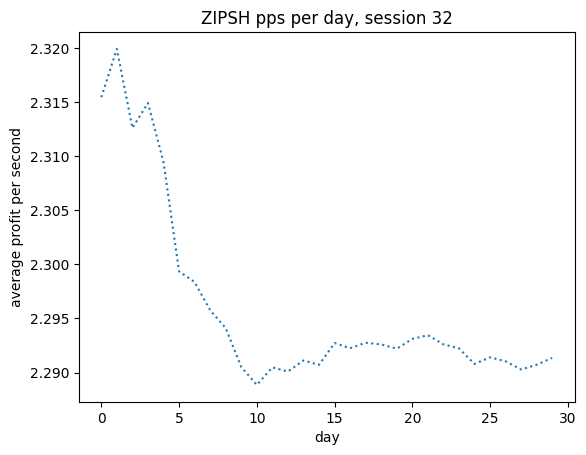

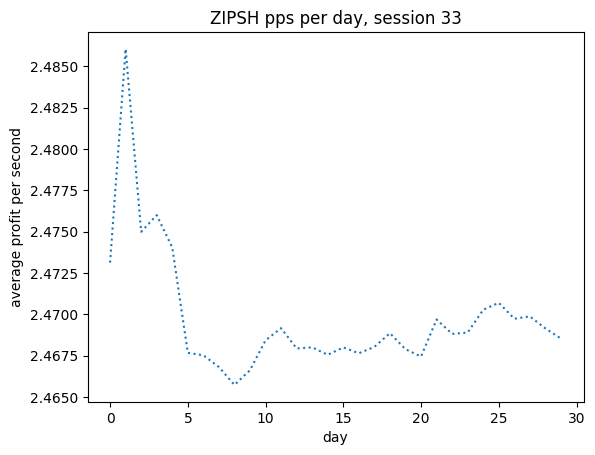

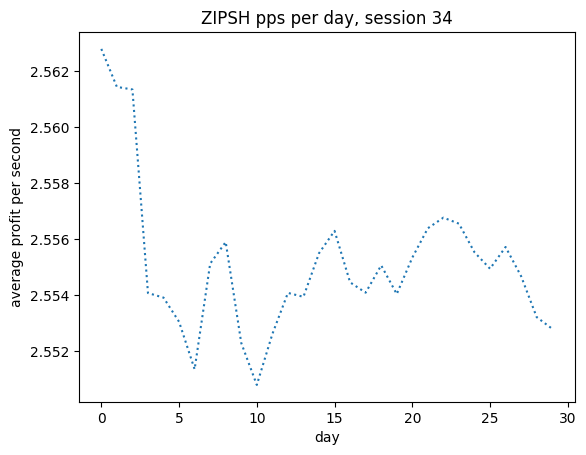

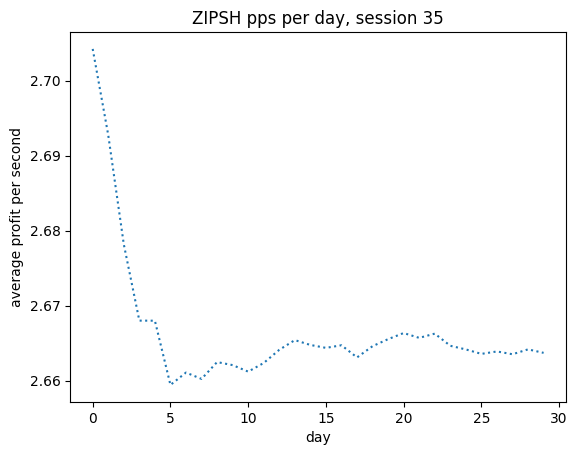

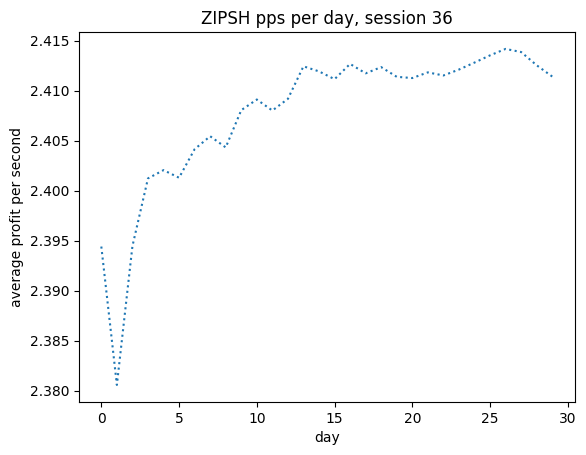

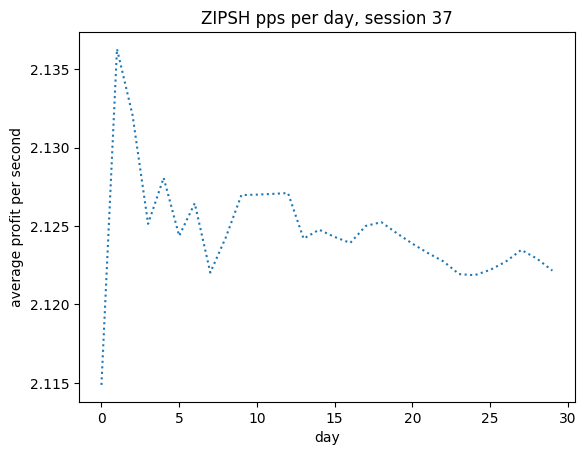

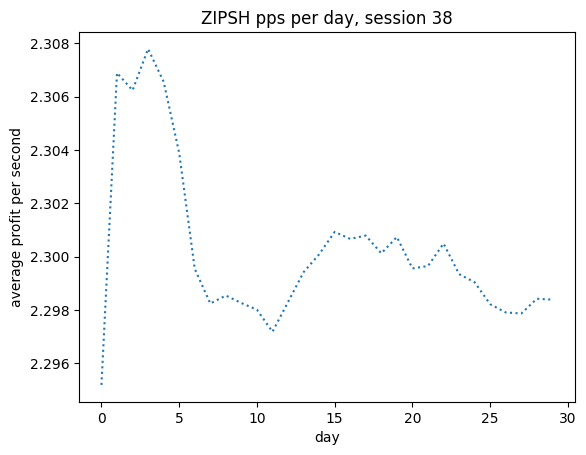

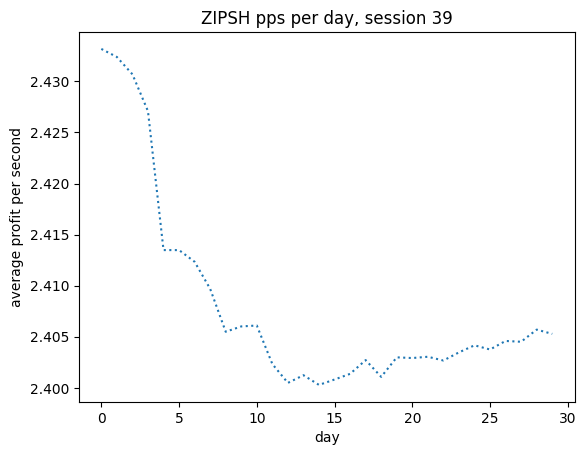

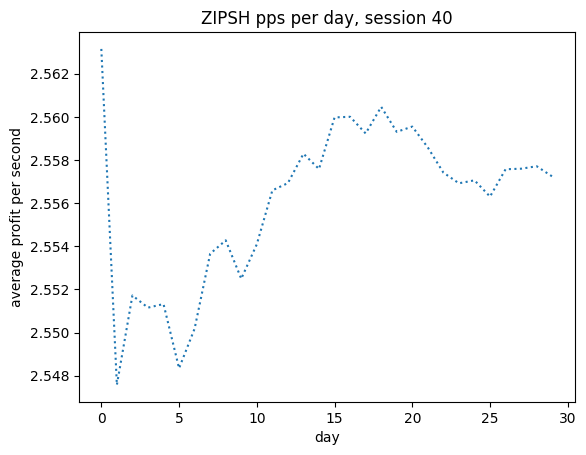

In [243]:
for i in range(len(total_avg_profit_perS)):
    plt.plot(total_avg_profit_perS[i], ':')
    plt.xlabel("day")
    plt.ylabel("average profit per second")
    plt.title("ZIPSH pps per day, session "+str(i+1))
    plt.show()

END OF REPORT. ONLY WORD COUNT BELOW THIS POINT. 

In [204]:
# Do not edit this code. It will print the word count of your notebook.
import io
from nbformat import current

def printWordCount(filepath):

    with io.open(filepath, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')

    word_count = 0
    for cell in nb.worksheets[0].cells:
        if cell.cell_type == "markdown":
            word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    print("Word count: " + str(word_count) + ". Limit is 2000 words.")

In [205]:
# This should be the final output of your notebook.
# Edit filename to be the same as this filename and then run.
# Save your file before running this code.

this_file_name = "CW-IEFT-template.ipynb" # Enter name of this file here
printWordCount(this_file_name)

Word count: 1286. Limit is 2000 words.


In [235]:
def find_bigger(pvals: list):
    res = []
    for i, p in enumerate(pvals):
        if p > 0.05:
            res.append(i)
    return res

def plot_performance_same_ratio(res50, res500):
    fig = plt.figure(figsize=(20, 7.5))
    ax1 = fig.add_subplot(221)
    ax1.plot(res50[0], 'r', res50[1], 'g', res50[2], 'b', res50[3], 'y')
    ax1.set_xlabel('session')
    ax1.set_ylabel('average profit')
    ax2 = fig.add_subplot(222)
    ax2.plot(res500[0], 'r', res500[1], 'g', res500[2], 'b', res500[3], 'y')
    ax2.set_xlabel('session')
    ax2.set_ylabel('average profit')

    ax1.title.set_text('zic vs zip vs shvr vs gvwy avg profit')
    ax2.title.set_text('zic vs zip vs shvr vs gvwy avg profit')

def gather_wins(res):
    gvwy_wins = [0] * 4
    shvr_wins = [0] * 4
    zic_wins = [0] * 4
    zip_wins = [0] * 4

    for i in range(4):
        shvr = res[i][0]
        gvwy = res[i][1]
        zic = res[i][2]
        zip_ = res[i][3]
        for z in range(len(shvr)):
            if shvr[z] > gvwy[z] and shvr[z] > zic[z] and shvr[z] > zip_[z]:
                shvr_wins[i] += 1
            if gvwy[z] > shvr[z] and gvwy[z] > zic[z] and gvwy[z] > zip_[z]:
                gvwy_wins[i] += 1
            if zic[z] > shvr[z] and zic[z] > gvwy[z] and zic[z] > zip_[z]:
                zic_wins[i] += 1
            if zip_[z] > shvr[z] and zip_[z] > zic[z] and zip_[z] > gvwy[z]:
                zip_wins[i] += 1
    return shvr_wins, gvwy_wins, zic_wins, zip_wins

def sub_plot_add(shvrw, gvwyw, zicw, zipw, fig, index, ratio, axID, n):
    ax = "ax"+str(axID)
    ax = fig.add_subplot(index)
    ax.plot(shvrw, 'r', gvwyw, 'g', zicw, 'b', zipw, 'y')
    title = 'for ratio ' + str(ratio) +', trader wins per permutation in ' + str(n) + ' sessions'
    ax.title.set_text(title)


def plot_wins_4(res1: list, ratio1: list, res2: list, ratio2: list, res3: list, ratio3: list, res4: list, ratio4: list, res5, ratio5, res6, ratio6):
    shvr_wins1, gvwy_wins1, zic_wins1, zip_wins1 = gather_wins(res1)
    shvr_wins2, gvwy_wins2, zic_wins2, zip_wins2 = gather_wins(res2)
    shvr_wins3, gvwy_wins3, zic_wins3, zip_wins3 = gather_wins(res3)
    shvr_wins4, gvwy_wins4, zic_wins4, zip_wins4 = gather_wins(res4)
    shvr_wins5, gvwy_wins5, zic_wins5, zip_wins5 = gather_wins(res5)
    shvr_wins6, gvwy_wins6, zic_wins6, zip_wins6 = gather_wins(res6)

    fig1 = plt.figure(figsize=(20, 7))
    
    sub_plot_add(shvr_wins1, gvwy_wins1, zic_wins1, zip_wins1, fig1, 221, ratio1, 1, len(res1[0][0]))
    sub_plot_add(shvr_wins2, gvwy_wins2, zic_wins2, zip_wins2, fig1, 222, ratio2, 2, len(res2[0][0]))
    sub_plot_add(shvr_wins3, gvwy_wins3, zic_wins3, zip_wins3, fig1, 223, ratio3, 3, len(res3[0][0]))
    sub_plot_add(shvr_wins4, gvwy_wins4, zic_wins4, zip_wins4, fig1, 224, ratio4, 4, len(res4[0][0]))
    fig2 = plt.figure(figsize=(20, 5))
    sub_plot_add(shvr_wins5, gvwy_wins5, zic_wins5, zip_wins5, fig2, 221, ratio5, 5, len(res5[0][0]))
    sub_plot_add(shvr_wins6, gvwy_wins6, zic_wins6, zip_wins6, fig2, 222, ratio6, 6, len(res6[0][0]))

def run_market_sim_D(trial_id, no_sessions, supply_range, demand_range, start_time, end_time, path):
    zipsh_num = 1
    zic_num = 10
    buyer_spec = [('ZIPSH', zipsh_num), ('ZIC', zic_num)]
    seller_spec = [('ZIC', zic_num)]
    trader_specs = {'sellers': seller_spec, 'buyers': buyer_spec}
    total_avg_zic = []
    total_avg_zipsh = []
    avg_pps_total = []
    total_avg_prof_per_session = []
    
    for _ in range(no_sessions):
        supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [supply_range], 'stepmode': 'fixed'}]
        demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [demand_range], 'stepmode': 'fixed'}]
        order_interval = 60
        order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                    'interval': order_interval, 'timemode': 'periodic'}
        dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
                            'dump_avgbals': True, 'dump_tape': False}

        verbose = False
        market_session(trial_id, start_time, end_time, trader_specs, order_sched, dump_flags, verbose)
        _, df_profit = make_df_D(path)
        _zic, _zipsh, avg_pps, avg_prof_per_sec = collect_avg_profit_D(df_profit)
        total_avg_zipsh.append(_zipsh)
        total_avg_zic.append(_zic)
        avg_pps_total.append(avg_pps)
        total_avg_prof_per_session.append(avg_prof_per_sec)
    
    return total_avg_zipsh, total_avg_zic, avg_pps_total, total_avg_prof_per_session

def make_df_D(path: str):
    df = pd.read_csv(path)
    df.columns =  ['name', 'time', 'curr best bid', 'curr best offer', 'trader1', 'total profit1', 'no. 1', 'avg profit1', 'trader2', 'total profit2', 'no. 2', 'avg profit2', 'err']
    df_profit = df[['time', 'avg profit1', 'avg profit2']]
    df_profit.columns = ['time', 'ZIPSH', 'ZIC']
    return df, df_profit

def collect_avg_profit_D(df):
    average_pps_per_day = []
    prof_per_sec = []
    _zic = df['ZIC'][len(df)-1]
    _zipsh = df['ZIPSH'][len(df)-1]
    _avg_pps = _zipsh/df['time'][len(df)-1]
    n = 1
    for i in range(len(df)):
            if i < 1:
                continue
            if df['time'][i] == df['time'][i-1]:
                continue
            pf = (df['ZIPSH'][i] - df['ZIPSH'][i-1])/(df['time'][i] - df['time'][i-1])
            prof_per_sec.append(pf)
            if df['time'][i] >= 60*60*24*n:
                n+=1
                average_pps_per_day.append((sum(prof_per_sec)/len(prof_per_sec)))
                
    return _zic, _zipsh, _avg_pps, average_pps_per_day